In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import scipy

In [2]:
%cd C:\Users\Zak White\My Datasets
    #input your working directory above
df = pd.read_csv('athlete_events.csv') #data set downloaded from https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

C:\Users\Zak White\My Datasets


In [3]:
print(df.head().append(df.tail()))
#sample data from the dataset

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2      

In [4]:
df.columns
#How is the data organized?

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
df.info()
# How "complete" is the data set and what data types are we dealing with. 
# First notice "UH OHH my Medal column isn't the same length as my ID column"
## This makes sense because not every Olympic Athlete will win a medal, sorry Millenials.
### We also see that some data about the athletes is missing.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
df['City'].unique()
#Here is a simple list of all of the host Cities.

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [7]:
df.groupby(['City','Year']).size().reset_index().rename(columns={0:'# of Participants'}).sort_values(by='Year')
# How "Big" was each olympics in terms of the number of athletes participating

,City,Year,# of Participants
3,Athina,1896,380
33,Paris,1900,1936
45,St. Louis,1904,1301
4,Athina,1906,1733
21,London,1908,3101
46,Stockholm,1912,4040
2,Antwerpen,1920,4292
34,Paris,1924,5233
11,Chamonix,1924,460
38,Sankt Moritz,1928,582


In [8]:

df.sort_values(by='Age',ascending=True)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze
252231,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Breaststroke,NaN
101378,51268,Beatrice Hutiu,F,11.0,151.0,38.0,Romania,ROU,1968 Winter,1968,Winter,Grenoble,Figure Skating,Figure Skating Women's Singles,NaN
140650,70616,Liu Luyang,F,11.0,NaN,NaN,China,CHN,1988 Winter,1988,Winter,Calgary,Figure Skating,Figure Skating Mixed Ice Dancing,NaN
237141,118925,Megan Olwen Devenish Taylor (-Mandeville-Ellis),F,11.0,157.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN
252230,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 100 metres Breaststroke,NaN
79024,40129,Luigina Giavotti,F,11.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver
102916,52070,Etsuko Inada,F,11.0,NaN,NaN,Japan,JPN,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Figure Skating,Figure Skating Women's Singles,NaN
73461,37333,Carlos Bienvenido Front Barrera,M,11.0,NaN,NaN,Spain,ESP,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Eights,NaN
94058,47618,"Sonja Henie (-Topping, -Gardiner, -Onstad)",F,11.0,155.0,45.0,Norway,NOR,1924 Winter,1924,Winter,Chamonix,Figure Skating,Figure Skating Women's Singles,NaN


In [9]:
df['Age'].describe()
#Let's take a brief statistical look at the age of every participating olympic athlete 

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [10]:
df[df['Age'].isnull()]
# There are 9474 Participants for which we don't know their age. We should exclude them from future

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN
152,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN
153,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN
212,102,Sayed Fahmy Abaza,M,NaN,NaN,NaN,Egypt,EGY,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
213,102,Sayed Fahmy Abaza,M,NaN,NaN,NaN,Egypt,EGY,1928 Summer,1928,Summer,Amsterdam,Football,Football Men's Football,NaN
261,133,Franz Abb,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN
268,139,"George ""Ioannis"" Abbot",M,NaN,NaN,NaN,Thessalonki-1,GRE,1906 Summer,1906,Summer,Athina,Football,Football Men's Football,Bronze
302,163,Ismail Abdallah,M,NaN,NaN,NaN,United Arab Republic,UAR,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Individual All-Around,NaN
303,163,Ismail Abdallah,M,NaN,NaN,NaN,United Arab Republic,UAR,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Team All-Around,NaN


In [11]:
z = df[df['Age'].notnull()]
#this cleans out any rows missing age data

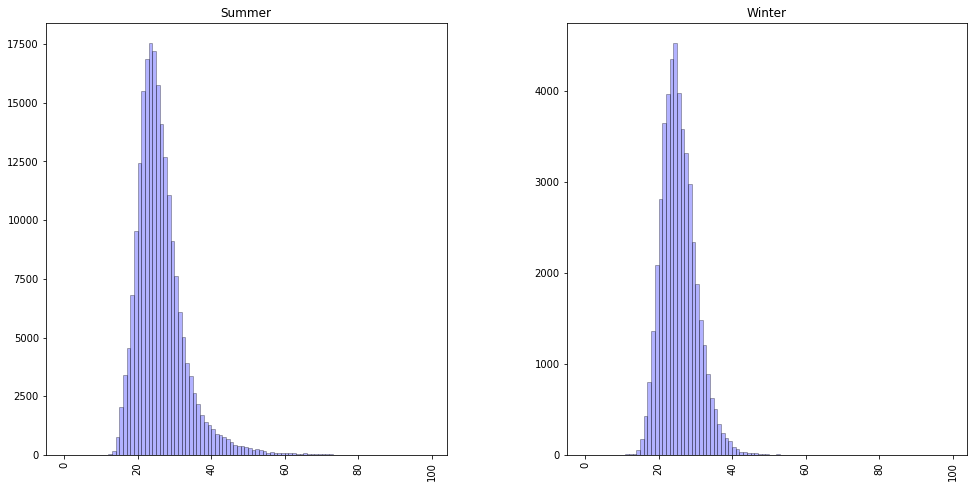

In [12]:
z['Age'].hist(by=df['Season'],bins = np.arange(0,100),alpha=.3,figsize=(16,8),facecolor='b',edgecolor='k')
plt.show()

#here is a side by side histogram of the age of athletes and which 

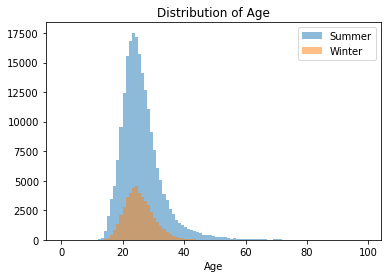

In [13]:
x = df[(df.Age.notnull())&(df.Season =='Summer')]['Age']
y = df[(df.Age.notnull())&(df.Season =='Winter')]['Age']

bins = np.arange(0,100)

plt.hist(x, bins, alpha=0.5, label='Summer')
plt.hist(y, bins, alpha=0.5, label='Winter')
plt.legend(loc='upper right')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

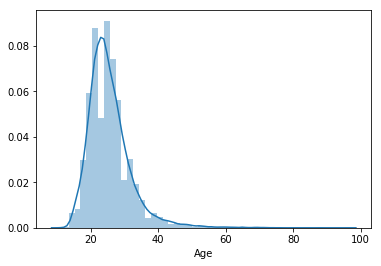

In [14]:
sns.distplot(z['Age'],axlabel='Age');

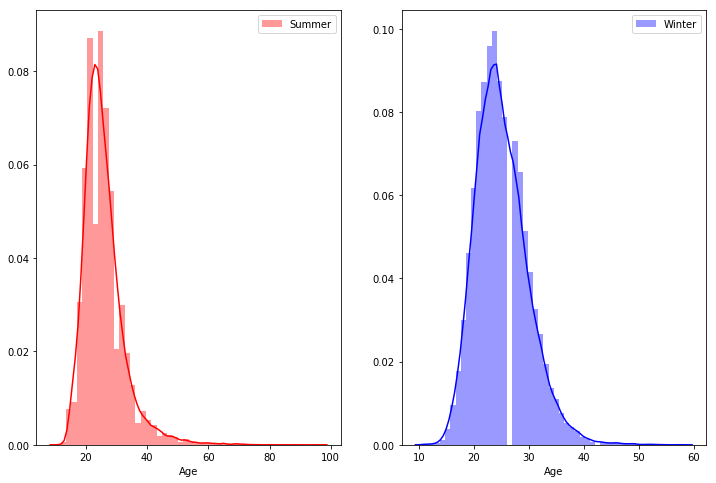

In [15]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.distplot(x,axlabel='Age', color='r',label='Summer')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
sns.distplot(y,axlabel='Age', color='b',label='Winter')
plt.legend(loc='upper right')
plt.show()



In [16]:
df[(df.Age == min(df.Age))|(df.Age == max(df.Age))]
# Oldest and Youngest Olympic Athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


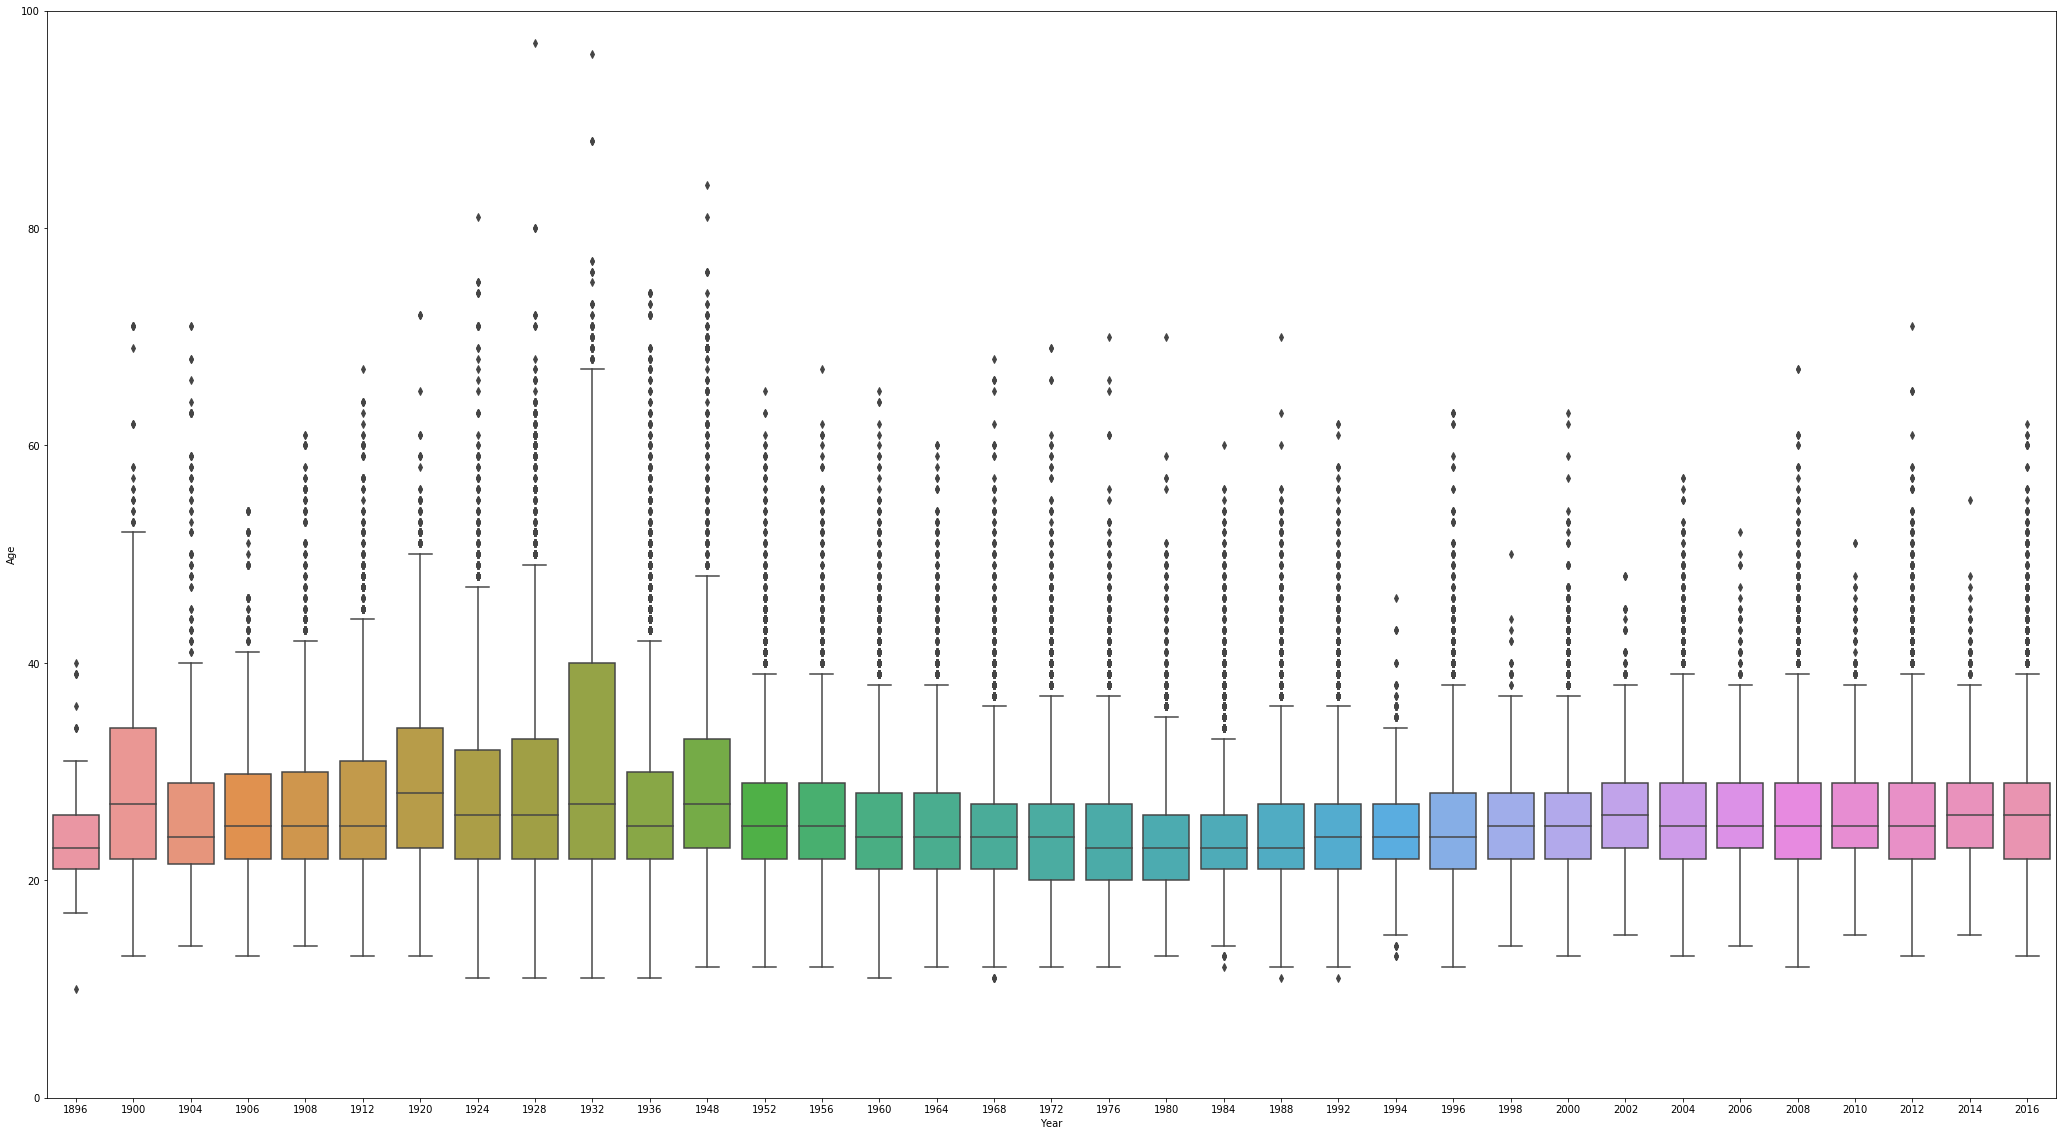

In [17]:
var = 'Year'
data = pd.concat([z['Age'], z[var]], axis=1)
f, ax = plt.subplots(figsize=(36, 20))
fig = sns.boxplot(x=var, y="Age", data=data)
fig.axis(ymin=0, ymax=100);